In [2]:
import tensorflow.compat.v1 as tf
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

Using TensorFlow backend.


In [3]:
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join([reverse_word_index.get(i-3, '?') for i in train_data[0]])
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [4]:
import numpy as np

def vectorize_seq(seq, dimension=10000):
    results = np.zeros((len(seq), dimension))
    for i, seq in enumerate(seq):
        results[i, seq] = 1.
    return results

x_train = vectorize_seq(train_data)
x_test = vectorize_seq(test_data)
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [5]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [6]:
from keras import models, layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])

W0814 22:58:38.347442 4765408576 deprecation_wrapper.py:119] From /Users/Dodanto/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0814 22:58:38.391813 4765408576 deprecation_wrapper.py:119] From /Users/Dodanto/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0814 22:58:38.413784 4765408576 deprecation_wrapper.py:119] From /Users/Dodanto/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0814 22:58:38.503942 4765408576 deprecation_wrapper.py:119] From /Users/Dodanto/anaconda3/lib/python3.7/site-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0814 22:58:38.55086

In [7]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [8]:
history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs=20,
                   batch_size=512,
                   validation_data=(x_val, y_val))

W0814 22:58:38.854114 4765408576 deprecation_wrapper.py:119] From /Users/Dodanto/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 3s 215us/step - loss: 0.5084 - acc: 0.7813 - val_loss: 0.3798 - val_acc: 0.8682
Epoch 2/20
15000/15000 [==============================] - 1s 86us/step - loss: 0.3005 - acc: 0.9047 - val_loss: 0.3004 - val_acc: 0.8896
Epoch 3/20
15000/15000 [==============================] - 1s 87us/step - loss: 0.2179 - acc: 0.9287 - val_loss: 0.3086 - val_acc: 0.8713
Epoch 4/20
15000/15000 [==============================] - 1s 84us/step - loss: 0.1751 - acc: 0.9437 - val_loss: 0.2840 - val_acc: 0.8831
Epoch 5/20
15000/15000 [==============================] - 1s 85us/step - loss: 0.1427 - acc: 0.9543 - val_loss: 0.2841 - val_acc: 0.8873
Epoch 6/20
15000/15000 [==============================] - 1s 84us/step - loss: 0.1150 - acc: 0.9650 - val_loss: 0.3163 - val_acc: 0.8771
Epoch 7/20
15000/15000 [==============================] - 1s 100us/step - loss: 0.0980 - acc: 0.9708 - val_loss: 0.3127 - val_a

In [9]:
import matplotlib.pyplot as plt

history_dict = history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label="Training loss")
plt.plot(epochs, val_loss, 'b', label="Validation loss")
plt.title("Training and Validation Loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

<Figure size 640x480 with 1 Axes>

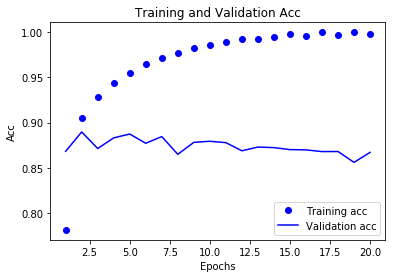

In [10]:
plt.clf()
acc = history_dict['acc']
val_acc = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label="Training acc")
plt.plot(epochs, val_acc, 'b', label="Validation acc")
plt.title("Training and Validation Acc")
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()

plt.show()

In [11]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)


Epoch 1/4
25000/25000 [==============================] - 2s 92us/step - loss: 0.4764 - acc: 0.8211
Epoch 2/4
25000/25000 [==============================] - 2s 61us/step - loss: 0.2640 - acc: 0.9097
Epoch 3/4
25000/25000 [==============================] - 1s 58us/step - loss: 0.1986 - acc: 0.9304
Epoch 4/4
25000/25000 [==============================] - 4s 141us/step


In [12]:
results

[0.3255396909141541, 0.87268]

In [13]:
model.predict(x_test)

array([[0.13454533],
       [0.9997034 ],
       [0.27480608],
       ...,
       [0.0727092 ],
       [0.04452264],
       [0.44546217]], dtype=float32)

In [16]:
# 추가실험 - 은닉층 수 변경 / mse / tanh
model = models.Sequential()
model.add(layers.Dense(32, activation='tanh', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
             loss='mse',
             metrics=['accuracy'])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)
results

Epoch 1/4
25000/25000 [==============================] - 2s 79us/step - loss: 0.1512 - acc: 0.8137
Epoch 2/4
25000/25000 [==============================] - 2s 69us/step - loss: 0.0719 - acc: 0.9111
Epoch 3/4
25000/25000 [==============================] - 2s 63us/step - loss: 0.0527 - acc: 0.9336
Epoch 4/4
25000/25000 [==============================] - 2s 65us/step


[0.08915592879116535, 0.88176]